In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv(r'D:\Python\FeatureEngineering\Lab_Feature_Engineering\лабораторная\data.csv')

In [59]:
dataset.head()

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [60]:
dataset.describe()

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 27820 non-null  object 
 1   age                 27820 non-null  object 
 2   suicides_no         27820 non-null  int64  
 3   population          27820 non-null  int64  
 4   suicides/100k pop   27820 non-null  float64
 5   country-year        27820 non-null  object 
 6   HDI for year        8364 non-null   float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


Есть пропущенные данные в столбце HDI for year. Связано с отсутствием статистики за более ранние периоды в некоторых странах. Также есть страны с отсутствующими данными.

In [62]:
dataset['year']= dataset['country-year'].str.extract('(\d+)').astype(int)
dataset.head()

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,year
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,1987
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,1987
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,1987
3,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,1987
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,1987


In [63]:
dataset['country']= dataset['country-year'].map(lambda x: str(x)[:-4])
dataset.head()

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,year,country
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,1987,Albania
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,1987,Albania
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,1987,Albania
3,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,1987,Albania
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,1987,Albania


In [5]:
dataset.profile_report()

AttributeError: 'DataFrame' object has no attribute 'profile_report'

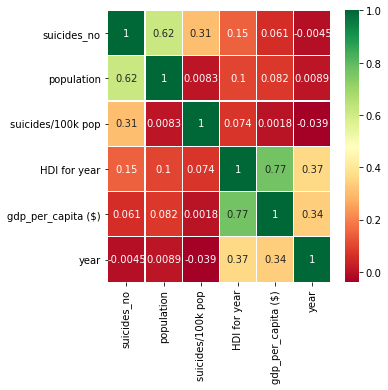

In [65]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(5,5)
plt.show()

Удаляем столбцы suicides_no и population, так как есть столбец suicides/100k pop, рассчитанный на основе первых двух.
Он более информативный.
Столбец country-year преобразовываем в два других столбца country и year
HDI for year удаляю, так как много пропущенных значений.
gdp_for_year ($) удаляю, gdp_per_capita ($) имеет большее значение.
Поля sex, age, generation,country нужно преобразовать.

In [66]:
data_new = dataset[['sex','age','suicides/100k pop','gdp_per_capita ($)','generation','year','country']]
data_new.head()

,sex,age,suicides/100k pop,gdp_per_capita ($),generation,year,country
0,male,15-24 years,6.71,796,Generation X,1987,Albania
1,male,35-54 years,5.19,796,Silent,1987,Albania
2,female,15-24 years,4.83,796,Generation X,1987,Albania
3,male,75+ years,4.59,796,G.I. Generation,1987,Albania
4,male,25-34 years,3.28,796,Boomers,1987,Albania


In [67]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_enc = LabelEncoder()
oh_enc = OneHotEncoder()

In [68]:
label_sex = label_enc.fit_transform(data_new['sex'])
data_new.loc[:, 'label_sex'] = label_sex.astype(int)
data_new = data_new.iloc[:,1:8]
data_new

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,age,suicides/100k pop,gdp_per_capita ($),generation,year,country,label_sex
0,15-24 years,6.71,796,Generation X,1987,Albania,1
1,35-54 years,5.19,796,Silent,1987,Albania,1
2,15-24 years,4.83,796,Generation X,1987,Albania,0
3,75+ years,4.59,796,G.I. Generation,1987,Albania,1
4,25-34 years,3.28,796,Boomers,1987,Albania,1
...,...,...,...,...,...,...,...
27815,35-54 years,2.96,2309,Generation X,2014,Uzbekistan,0
27816,75+ years,2.58,2309,Silent,2014,Uzbekistan,0
27817,5-14 years,2.17,2309,Generation Z,2014,Uzbekistan,1
27818,5-14 years,1.67,2309,Generation Z,2014,Uzbekistan,0


In [69]:
ohe_age_group = oh_enc.fit_transform(dataset[['age']]).toarray()
ohe_age_group = pd.DataFrame(ohe_age_group, columns=oh_enc.categories_[0])
ohe_age_group.head()

,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0


In [70]:
data_new = data_new.reset_index(drop=True)
data_new.head(5)

,age,suicides/100k pop,gdp_per_capita ($),generation,year,country,label_sex
0,15-24 years,6.71,796,Generation X,1987,Albania,1
1,35-54 years,5.19,796,Silent,1987,Albania,1
2,15-24 years,4.83,796,Generation X,1987,Albania,0
3,75+ years,4.59,796,G.I. Generation,1987,Albania,1
4,25-34 years,3.28,796,Boomers,1987,Albania,1


In [71]:
data_new = data_new.join(ohe_age_group)
data_new.drop(['age'], axis=1, inplace=True)
data_new.head(5)

,suicides/100k pop,gdp_per_capita ($),generation,year,country,label_sex,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
0,6.71,796,Generation X,1987,Albania,1,1.0,0.0,0.0,0.0,0.0,0.0
1,5.19,796,Silent,1987,Albania,1,0.0,0.0,1.0,0.0,0.0,0.0
2,4.83,796,Generation X,1987,Albania,0,1.0,0.0,0.0,0.0,0.0,0.0
3,4.59,796,G.I. Generation,1987,Albania,1,0.0,0.0,0.0,0.0,0.0,1.0
4,3.28,796,Boomers,1987,Albania,1,0.0,1.0,0.0,0.0,0.0,0.0


In [72]:
ohe_country = oh_enc.fit_transform(dataset[['country']]).toarray()
ohe_country = pd.DataFrame(ohe_country, columns=oh_enc.categories_[0])
ohe_country.head()

,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,...,Thailand,Trinidad and Tobago,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
data_new = data_new.join(ohe_country)
data_new.drop(['country'], axis=1, inplace=True)
data_new.head(5)

,suicides/100k pop,gdp_per_capita ($),generation,year,label_sex,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,...,Thailand,Trinidad and Tobago,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan
0,6.71,796,Generation X,1987,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.19,796,Silent,1987,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.83,796,Generation X,1987,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.59,796,G.I. Generation,1987,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.28,796,Boomers,1987,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
ohe_generation = oh_enc.fit_transform(dataset[['generation']]).toarray()
ohe_generation = pd.DataFrame(ohe_generation, columns=oh_enc.categories_[0])
ohe_generation.head()

,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In [75]:
data_new = data_new.join(ohe_generation)
data_new.drop(['generation'], axis=1, inplace=True)
data_new.head(5)

,suicides/100k pop,gdp_per_capita ($),year,label_sex,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,...,United Kingdom,United States,Uruguay,Uzbekistan,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent
0,6.71,796,1987,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,5.19,796,1987,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4.83,796,1987,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.59,796,1987,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3.28,796,1987,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [76]:
real_vars = dataset[['suicides/100k pop','gdp_per_capita ($)','year']]
bool_vars = data_new.drop(real_vars,axis=1)

In [77]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mm_scaler = MinMaxScaler()
mm_scaled_real_vars = mm_scaler.fit_transform(real_vars)
mm_scaled_real_vars = pd.DataFrame(mm_scaled_real_vars, columns=real_vars.columns)
X_mm = mm_scaled_real_vars.join(bool_vars)

y = dataset['suicides/100k pop']

X_mm.head(5)

,suicides/100k pop,gdp_per_capita ($),year,label_sex,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,...,United Kingdom,United States,Uruguay,Uzbekistan,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent
0,0.029826,0.004322,0.064516,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.023070,0.004322,0.064516,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.021470,0.004322,0.064516,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.020403,0.004322,0.064516,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.014580,0.004322,0.064516,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [78]:
from sklearn.model_selection import train_test_split

rand_state = 1000

X_mm_train, X_mm_test, y_mm_train, y_mm_test = train_test_split(X_mm, y, test_size=0.2, random_state=rand_state)

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

def lin_reg_fit(X_train, X_test, y_train, y_test, with_est=True):
    estimator = LinearRegression()
    estimator.fit(drop_zest(X_train, with_est), y_train)

    train_pred = estimator.predict(drop_zest(X_train, with_est))
    test_pred = estimator.predict(drop_zest(X_test, with_est))
    
    train_mae = mean_absolute_error(train_pred, y_train)
    test_mae = mean_absolute_error(test_pred, y_test)
    
    print(f'Train MAE: {np.round(train_mae, 4)}')
    print(f'Test MAE: {np.round(test_mae, 4)}')
    
    return estimator

In [80]:
mm_est = lin_reg_fit(X_mm_train, X_mm_test, y_mm_train, y_mm_test)

Train MAE: 0.0
Test MAE: 0.0
